<a href="https://colab.research.google.com/github/u1829584/Content_based_movie_recommender/blob/master/dm_lab_2_fm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise-2
## by Fayyaz Minhas
## Gradient Descent and Perceptron


# Understanding gradient Descent

We discussed how gradient descent works for solving optimization problems: By taking steps in a direction opposite to the gradient. Below is a very simple implementation for this method. Based on this, can you:
1. Try to understand how Gradient Descent Works
2. Can you find the  minima of the following function: $f(x)=2x^2-x$. You will need to update the implementation of the function and its derivative in the code for this.
3. What happens when you use: $f(x)=sin(3x)$? Is this function convex?
4. What do you think are the limitations of gradient descent for non-convex functions?
5. What happens when you change the learning rate parameter (step size)?
You can also look into questions posted as part of the self assessment exercise.



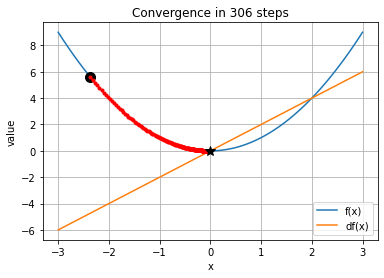

In [12]:
import numpy as np
import math 

def gd(f,df,x0=0.0,lr = 0.01,eps=1e-4,nmax=1000, history = True):
    """
    Implementation of a gradient descent solver.
        f: function, f(x) returns value of f(x) for a given x
        df: gradient function df(x) returns the gradient at x
        x0: initial position [Default 0.0]
        lr: learning rate [0.001]
        eps: min step size threshold [1e-4]
        nmax: maximum number of iters [1000]
        history: whether to store history of x or not [True]
    Returns:
        x: argmin_x f(x)
        converged: True if the final step size is less than eps else false
        H: history
    """
    H = []
    x = x0
    if history:
        H = [[x,f(x)]]
    for i in range(nmax):
        dx = -lr*df(x) #gradient step
        if np.linalg.norm(dx)<eps: # if the step taken is too small, we have converged
            break
        if history:
            H.append([x+dx,f(x+dx)])
        x = x+dx #gradient update
    converged = np.linalg.norm(dx)<eps        
    return x,converged,np.array(H)
    
if __name__=='__main__':
    import matplotlib.pyplot as plt
    def f(x):
        y = x**2 
        return y
    def df(x):
        dy = 2*x
        return dy
    def f_2(x):
       y = 2*(x**2) -2
       return y
    def df_2(x):
      y = 4*x
      return y
    def f_3(x):
      y = np.sin(3*(x))
      return y
    def df_3(x):
      y = 3*(np.cos(3*x))
      return y

    z = np.linspace(-3,3,100)
    #select random initial point in the range
    x0 = np.min(z)+(np.max(z)-np.min(z))*np.random.rand()
    
    x,c,H = gd(f,df,x0=x0,lr = 0.01,eps=1e-4,nmax=1000, history = True) 
    
    plt.plot(z,f(z)); plt.plot(z,df(z));
    plt.legend(['f(x)','df(x)'])
    plt.xlabel('x');plt.ylabel('value')
    s = 'Convergence in '+str(len(H))+' steps'
    if not c:
        s = 'No '+s
    plt.title(s)
    plt.plot(H[0,0],H[0,1],'ko',markersize=10)
    plt.plot(H[:,0],H[:,1],'r.-')
    plt.plot(H[-1,0],H[-1,1],'k*',markersize=10)    
    plt.grid(); plt.show()

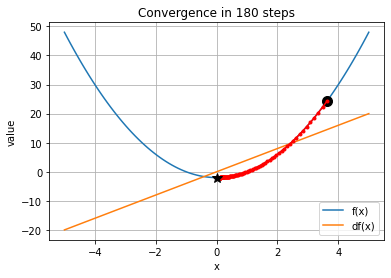

In [6]:
z = np.linspace(-5,5,100)
#select random initial point in the range
x0 = np.min(z)+(np.max(z)-np.min(z))*np.random.rand()

x,c,H = gd(f_2,df_2,x0=x0,lr = 0.01,eps=1e-4,nmax=1000, history = True) 

plt.plot(z,f_2(z)); plt.plot(z,df_2(z));
plt.legend(['f(x)','df(x)'])
plt.xlabel('x');plt.ylabel('value')
s = 'Convergence in '+str(len(H))+' steps'
if not c:
    s = 'No '+s
plt.title(s)
plt.plot(H[0,0],H[0,1],'ko',markersize=10)
plt.plot(H[:,0],H[:,1],'r.-')
plt.plot(H[-1,0],H[-1,1],'k*',markersize=10)    
plt.grid(); plt.show()

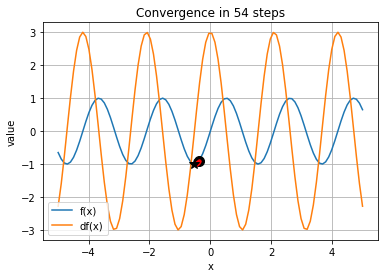

In [13]:
z = np.linspace(-5,5,100)
#select random initial point in the range
x0 = np.min(z)+(np.max(z)-np.min(z))*np.random.rand()

x,c,H = gd(f_3,df_3,x0=x0,lr = 0.01,eps=1e-4,nmax=1000, history = True) 

plt.plot(z,f_3(z)); plt.plot(z,df_3(z));
plt.legend(['f(x)','df(x)'])
plt.xlabel('x');plt.ylabel('value')
s = 'Convergence in '+str(len(H))+' steps'
if not c:
    s = 'No '+s
plt.title(s)
plt.plot(H[0,0],H[0,1],'ko',markersize=10)
plt.plot(H[:,0],H[:,1],'r.-')
plt.plot(H[-1,0],H[-1,1],'k*',markersize=10)    
plt.grid(); plt.show()

## Importing plotit

To use the code in the following exercises you will need to execute the cell below


In [14]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

## Trying out Perceptron!

Let's try a single Perceptron on the same toy problem. More help on using Perceptron in sk-learn is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Here are some questions for you:

1. What are your observations about the line that is drawn by this predictor? 
2. What happens to the line if you change the data?
3. Is this line optimal? 
4. Can you predict the score and class label for a new test point, say [2,0]? Is this point classified correctly?
5. You can use clf.coef_ and clf.intercept_ to get the weight vector and bias learned by the method. What do these weights and their signs tell you about your data? 
6. Try changing the data and observe how that impacts the weight vector. Solve the AND, OR and XOR problems.
7. What happens when your data is not linearly separable?

You can also look into questions posted as part of the self assessment exercise related to this.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'label'


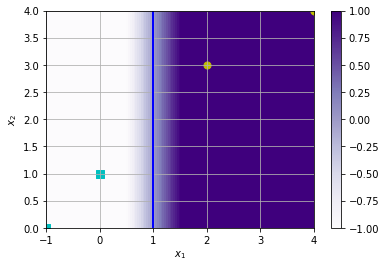

Learned Weights:  [[2. 0.]]
Bias:  [-2.]


In [15]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
X = np.array([[-1,0],[0,1],[4,4],[2,3]])
y = np.array([-1,-1,+1,+1])
clf.fit(X,y)
plotit(X,y,clf=clf.decision_function,conts=[0.0])
print("Learned Weights: ",clf.coef_)
print("Bias: ",clf.intercept_)

## Classifying digits
Below is a code for classifying between MNIST digits (7 vs 9) using nearest neighbor and Perceptron classifiers. Please try to understand the code and answer the following questions.

Accuracy of kNN: 0.9738372093023255


Text(0.5, 1.05, 'Misclassified: Predicted as 1')

<Figure size 432x288 with 0 Axes>

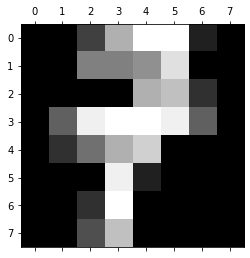

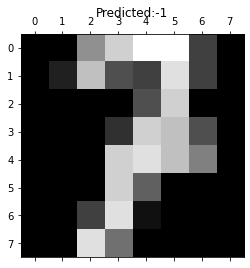

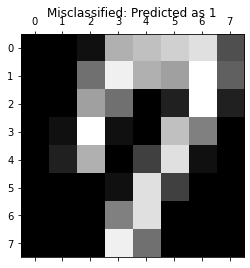

In [17]:
import numpy as np
from sklearn.datasets import load_digits
import random
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
digN,digP = 7,9
X,y = load_digits(n_class=10, return_X_y=True) #load the digits dataset
idx = (y==digP) + (y==digN) #Just focus on 7 and 9
X,y = X[idx,:], y[idx]
y[y==digN]=-1.0 #set (negative class)
y[y==digP]=+1.0 #set (positive class)
idx = list(range(len(y)))
random.shuffle(idx) # Just shuffle the data
X,y = X[idx,:], y[idx]
plt.gray();plt.matshow(X[0].reshape((8,-1))) 
# show an example. we need to reshape to show as an image.

Ntr = 15 #select number of training examples
Xtr,Ytr = X[:Ntr], y[:Ntr] #get training examples
Xtt,Ytt = X[Ntr:], y[Ntr:] #get validation (test) examples

clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(Xtr, Ytr)
Z = clf.predict(Xtt)
print('Accuracy of kNN:',np.mean(Z==Ytt))
plt.gray();plt.matshow(Xtt[0].reshape((8,-1))); plt.title('Predicted:'+str(Z[0]))
error_idx = np.nonzero(Ytt!=np.sign(Z))[0][0] # show one error example
plt.gray();plt.matshow(Xtt[error_idx].reshape((8,-1))); plt.title('Misclassified: Predicted as '+str(Z[error_idx])) # show a misclassification





1. What is the relationship between accuracy over test examples and training set size for the classifier? How can you design an experiment to do this?
2. What is the impact of changing the value of k in the nearest neighbor classifier? Which value of k gives you the best validation performance?
3. Here, we are using each pixel as a feature. Can you extract better features that allow you to do better classification? 

## Using Perceptron for Digit Classification

Use the codes provided above and compare the predictive performance of a perceptron for this problem. Compare the performance of the perceptron to the k-NN classifier. Which one is better and what is your intuition as to why that is the case.



Accuracy of Perceptron: 0.8895348837209303
Score:  0.8895348837209303


Text(0.5, 1.05, 'Misclassified: Predicted as -1')

<Figure size 432x288 with 0 Axes>

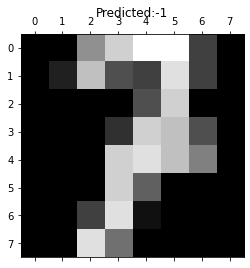

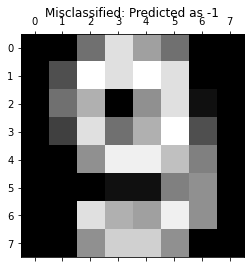

In [19]:
# Your code goes here
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(Xtr, Ytr)
Z = clf.predict(Xtt)
acc = clf.score(Xtt, Ytt)

Z = clf.predict(Xtt)
print('Accuracy of Perceptron:',np.mean(Z==Ytt))
print('Score: ', acc)
plt.gray();plt.matshow(Xtt[0].reshape((8,-1))); plt.title('Predicted:'+str(Z[0]))
error_idx = np.nonzero(Ytt!=np.sign(Z))[0][0] # show one error example
plt.gray();plt.matshow(Xtt[error_idx].reshape((8,-1))); plt.title('Misclassified: Predicted as '+str(Z[error_idx])) # show a misclassification

Once you have trained and evaluated your perceptron, execute the following cell to show the internal representation of the weights of the perceptron (clf). What is your intuition about this?

<Figure size 432x288 with 0 Axes>

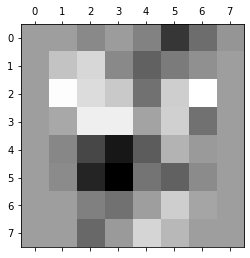

In [20]:
plt.gray();plt.matshow(clf.coef_.reshape((8,-1)))